## Solving the Project Plan

In [6]:
from pulp import LpVariable, LpProblem, LpMinimize, LpStatus, value, lpSum
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Function to solve the project plan
def solve_project_plan(durations, scenario_name):
    # Create the LP problem
    lp_problem = LpProblem(f"Minimize_Project_Time_{scenario_name}", LpMinimize)

    # Define decision variables for task times
    time_vars = LpVariable.dicts("Task_Time", durations.keys(), lowBound=0)

    # Objective function: Minimize total time
    lp_problem += lpSum(time_vars[task] for task in durations), "Total_Time"

    # Adding constraints based on task dependencies
    lp_problem += time_vars['C'] >= time_vars['A'] + durations['A'], "C_A_Constraint"  
    lp_problem += time_vars['D1'] >= time_vars['A'] + durations['A'], "D1_A_Constraint"  
    lp_problem += time_vars['D2'] >= time_vars['D1'] + durations['D1'], "D2_D1_Constraint"  
    lp_problem += time_vars['D3'] >= time_vars['D1'] + durations['D1'], "D3_D1_Constraint"  
    
    # Constraints for D4
    lp_problem += time_vars['D4'] >= time_vars['D2'] + durations['D2'], "D4_D2_Constraint"
    lp_problem += time_vars['D4'] >= time_vars['D3'] + durations['D3'], "D4_D3_Constraint"
    
    lp_problem += time_vars['D5'] >= time_vars['D4'] + durations['D4'], "D5_D4_Constraint"  
    lp_problem += time_vars['D6'] >= time_vars['D4'] + durations['D4'], "D6_D4_Constraint"  
    lp_problem += time_vars['D7'] >= time_vars['D6'] + durations['D6'], "D7_D6_Constraint"  
    
    # Constraints for D8
    lp_problem += time_vars['D8'] >= time_vars['D5'] + durations['D5'], "D8_D5_Constraint"  
    lp_problem += time_vars['D8'] >= time_vars['D7'] + durations['D7'], "D8_D7_Constraint"  
    
    # Constraints for E
    lp_problem += time_vars['E'] >= time_vars['B'] + durations['B'], "E_B_Constraint"
    lp_problem += time_vars['E'] >= time_vars['C'] + durations['C'], "E_C_Constraint"  
    
    # Constraints for F
    lp_problem += time_vars['F'] >= time_vars['D8'] + durations['D8'], "F_D8_Constraint"  
    # G depends on A and D8
    lp_problem += time_vars['G'] >= time_vars['A'] + durations['A'], "G_A_Constraint"
    lp_problem += time_vars['G'] >= time_vars['D8'] + durations['D8'], "G_D8_Constraint"  
    
    # Constraints for H
    lp_problem += time_vars['H'] >= time_vars['F'] + durations['F'], "H_F_Constraint"  
    lp_problem += time_vars['H'] >= time_vars['G'] + durations['G'], "H_G_Constraint"
    # Solve the problem
    lp_problem.solve()

    print(f"\nResults for {scenario_name}:")
    print("Status:", LpStatus[lp_problem.status])
    
    completion_times = {task: time_vars[task].varValue for task in durations.keys()}
    total_completion_time = max(completion_times.values())
    print(f"Total Project Completion Time: {total_completion_time} hours")

    for task, completion_time in completion_times.items():
        print(f"Completion time for task {task}: {completion_time} hours")



## Best Case 

In [2]:
# Solve forbest-case scenarios
print("Best Case")
best_case_hours = {
    'A': 6,
    'B': 15,
    'C': 12,
    'D1': 18,
    'D2': 4,
    'D3': 25,
    'D4': 10,
    'D5': 15,
    'D6': 18,
    'D7': 25,
    'D8': 6,
    'E': 10,
    'F': 10,
    'G': 15,
    'H': 10
}

# Solve the project plan for the expected case
time_vars_expected = solve_project_plan(best_case_hours, "Best_Case")

Best Case
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/amerchant/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/26651f88913c4dd2a32c8bf2d06185c4-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/26651f88913c4dd2a32c8bf2d06185c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23 COLUMNS
At line 75 RHS
At line 94 BOUNDS
At line 95 ENDATA
Problem MODEL has 18 rows, 15 columns and 36 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-18) rows, 0 (-15) columns and 0 (-36) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 763
After Postsolve, objective 763, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 763 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions ch

## Expected Case

In [17]:
# Solve for expected-case scenarios
print("Expected Case")
expected_hours = {
    'A': 6,
    'B': 15,
    'C': 12,
    'D1': 18,
    'D2': 25,
    'D3': 25,
    'D4': 50,
    'D5': 15,
    'D6': 18,
    'D7': 25,
    'D8': 12,
    'E': 15,
    'F': 10,
    'G': 15,
    'H': 10
}


# Solve the project plan for the expected case
time_vars_expected = solve_project_plan(expected_hours, "Expected_Case")

Expected Case
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/amerchant/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/071f90e84fdf49189490c848b3af3958-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/071f90e84fdf49189490c848b3af3958-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23 COLUMNS
At line 61 RHS
At line 80 BOUNDS
At line 81 ENDATA
Problem MODEL has 18 rows, 15 columns and 36 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-18) rows, 0 (-15) columns and 0 (-36) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 169
After Postsolve, objective 169, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 169 - 0 iterations time 0.002, Presolve 0.00
Option for printingOption

## Worst Case

In [4]:
# Solve for worst-case scenarios
print("Worst Case")
worst_case_hours = {
    'A': 6,
    'B': 144,
    'C': 12,
    'D1': 24,
    'D2': 49,
    'D3': 49,
    'D4': 99,
    'D5': 142,
    'D6': 117,
    'D7': 142,
    'D8': 154,
    'E': 159,
    'F': 169,
    'G': 169,
    'H': 179
}


# Solve the project plan for the expected case
time_vars_expected = solve_project_plan(worst_case_hours, "Worst_Case")

Worst Case
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/amerchant/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/37049da6632c45d1a334dc65e55a28a7-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/vk/41zv6b1x0s5g_x9plyd9lt6h0000gn/T/37049da6632c45d1a334dc65e55a28a7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23 COLUMNS
At line 75 RHS
At line 94 BOUNDS
At line 95 ENDATA
Problem MODEL has 18 rows, 15 columns and 36 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-18) rows, 0 (-15) columns and 0 (-36) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 3325
After Postsolve, objective 3325, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3325 - 0 iterations time 0.002, Presolve 0.00
Option for printingOption

Solving for Best Case scenario
Critical Path: ['A', 'D1', 'D3', 'D4', 'D6', 'D7', 'D8', 'G', 'H']
Total Project Duration on the Critical Path: Best Case is 133 hours



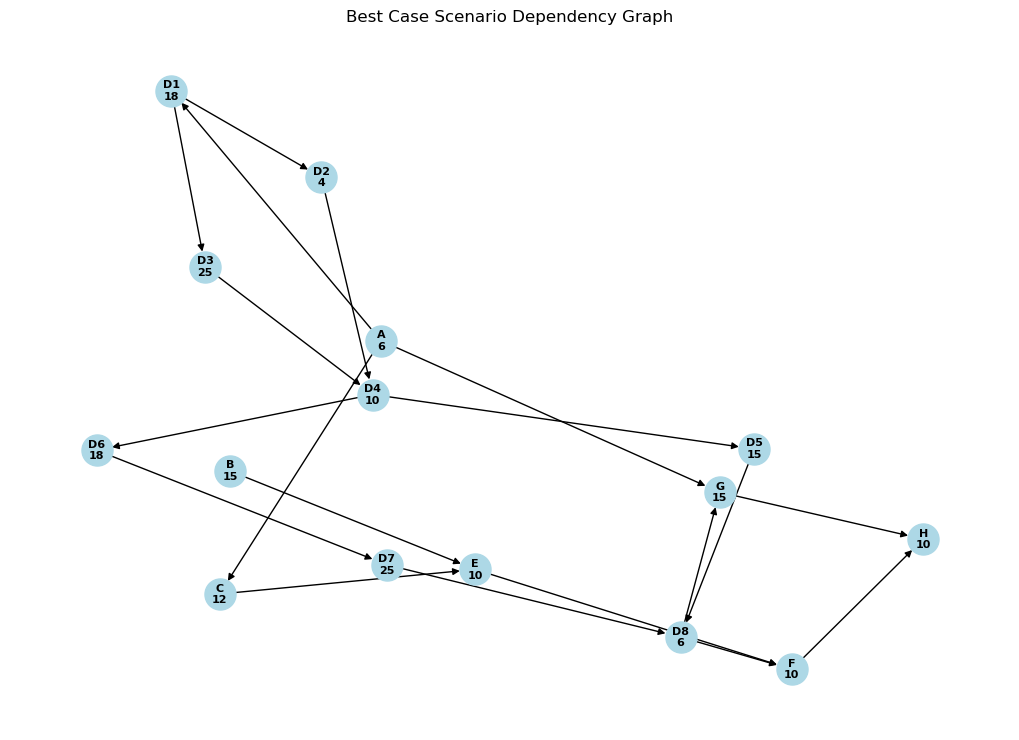

Solving for Expected Case scenario
Critical Path: ['A', 'D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'G', 'H']
Total Project Duration on the Critical Path: Expected Case is 179 hours



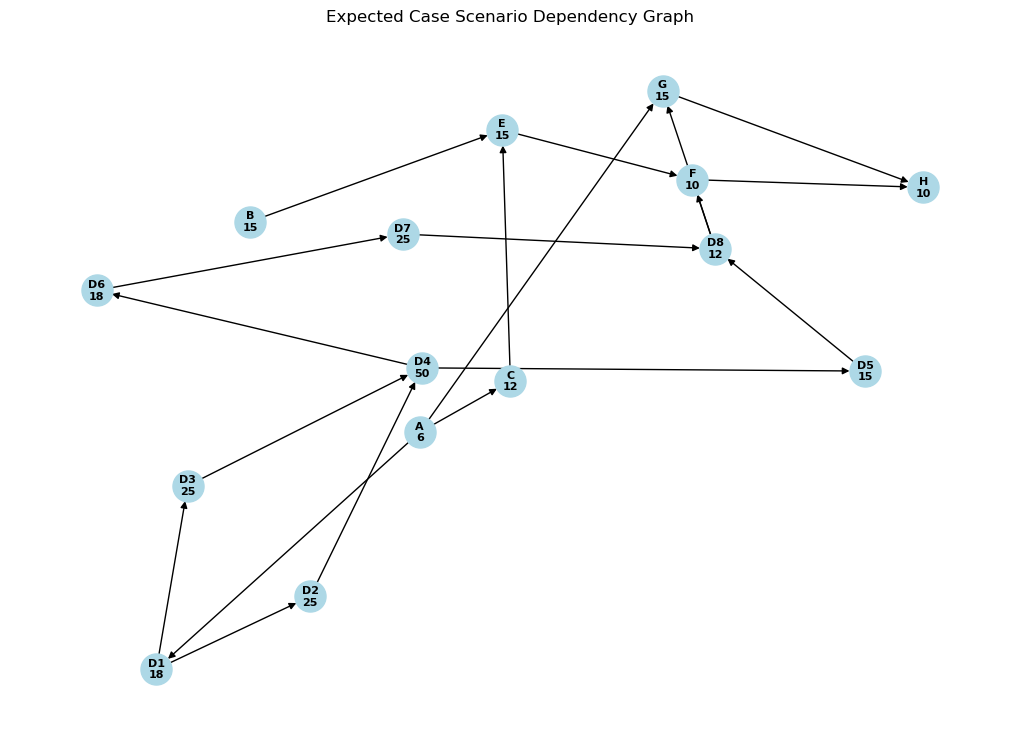

Solving for Worst Case scenario
Critical Path: ['A', 'D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'F', 'G', 'H']
Total Project Duration on the Critical Path: Worst Case is 939 hours



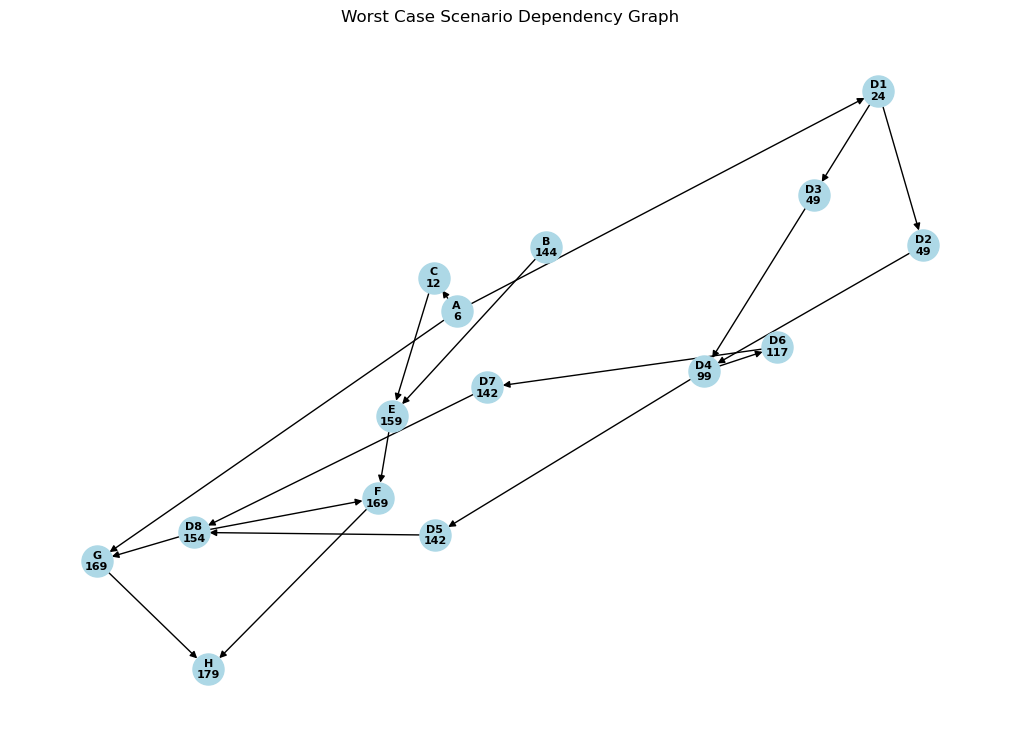

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define task data
tasks = {
    'TaskID': ['A', 'B', 'C', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'E', 'F', 'G', 'H'],
    'Task': ['Describe product', 'Develop marketing strategy', 'Design brochure', 
             'Requirements analysis', 'Software design', 'System design', 
             'Coding', 'Write documentation', 'Unit testing', 'System testing', 
             'Package deliverables', 'Survey potential market', 'Develop pricing plan', 
             'Develop implementation plan', 'Write client proposal'],
    'Predecessor': [None, None, 'A', 'A', 'D1', 'D1', 'D2,D3', 'D4', 'D4', 'D6', 'D5,D7', 
                    'B,C', 'D8,E', 'A,D8', 'F,G'],
    'BestCase': [6, 15, 12, 18, 4, 25, 10, 15, 18, 25, 6, 10, 10, 15, 10],
    'Expected': [6, 15, 12, 18, 25, 25, 50, 15, 18, 25, 12, 15, 10, 15, 10],
    'WorstCase': [6, 144, 12, 24, 49, 49, 99, 142, 117, 142, 154, 159, 169, 169, 179]
}

df = pd.DataFrame(tasks)

# Build directed graph based on dependencies
def build_graph(df, time_estimate):
    G = nx.DiGraph()
    
    # Add tasks to graph
    for _, row in df.iterrows():
        task_id = row['TaskID']
        duration = row[time_estimate]
        predecessors = row['Predecessor']
        
        # Assign node duration (task duration)
        G.add_node(task_id, weight=duration)
        
        # Handle predecessor relationships
        if predecessors:
            pred_tasks = predecessors.split(',')
            for pred in pred_tasks:
                G.add_edge(pred, task_id)  # Add edge between predecessor and current task

    return G

# Forward and backward pass to compute earliest/latest start/finish times
def calculate_critical_path(G):
    # Forward pass to calculate earliest start/finish
    ES = {}
    EF = {}
    
    for node in nx.topological_sort(G):
        ES[node] = max([EF.get(pred, 0) for pred in G.predecessors(node)], default=0)
        EF[node] = ES[node] + G.nodes[node]['weight']
    
    # Backward pass to calculate latest start/finish
    LS = {}
    LF = {}
    project_duration = max(EF.values())
    
    for node in reversed(list(nx.topological_sort(G))):
        LF[node] = min([LS.get(succ, project_duration) for succ in G.successors(node)], default=project_duration)
        LS[node] = LF[node] - G.nodes[node]['weight']
    
    # Calculate slack and identify critical path
    critical_path = []
    for node in G.nodes:
        slack = LS[node] - ES[node]
        if slack == 0:
            critical_path.append(node)
    
    return ES, EF, LS, LF, critical_path, project_duration

# Visualization function for the dependency graph with durations
def visualize_dependency_graph(G, time_estimate, scenario_name):
    # Define positions for all nodes
    pos = nx.spring_layout(G)  
    
    # Extract the duration labels for tasks
    task_durations = {task: f"{task}\n{G.nodes[task]['weight']}" for task in G.nodes()}
    
    # Plot the graph
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, labels=task_durations, node_color='lightblue', 
            node_size=500, font_size=8, font_weight='bold', arrows=True)
    
    # Set the title based on the scenario
    plt.title(f"{scenario_name} Scenario Dependency Graph")
    
    # Save and show the graph
    plt.savefig(f"{scenario_name.lower()}_dependency_graph.png", format="png")
    plt.show()

# Define dependencies for all scenarios
dependencies = {
    'C': ['A'],       # Design brochure depends on Describe product
    'D1': ['A'],      # Requirements analysis depends on Describe product
    'D2': ['D1'],     # Software design depends on Requirements analysis
    'D3': ['D1'],     # System design depends on Requirements analysis
    'D4': ['D2', 'D3'], # Coding depends on Software and System design
    'D5': ['D4'],     # Write documentation depends on Coding
    'D6': ['D4'],     # Unit testing depends on Coding
    'D7': ['D6'],     # System testing depends on Unit testing
    'D8': ['D5', 'D7'], # Package deliverables depend on documentation and testing
    'E': ['B', 'C'],  # Survey potential market depends on Develop marketing strategy and Design brochure
    'F': ['D8'],      # Develop pricing plan depends on Package deliverables
    'G': ['A', 'D8'], # Develop implementation plan depends on Describe product and Package deliverables
    'H': ['F', 'G']   # Write client proposal depends on pricing plan and implementation plan
}

# Solve for each scenario (best-case, expected, worst-case)
scenarios = {'BestCase': 'Best Case', 'Expected': 'Expected Case', 'WorstCase': 'Worst Case'}
for scenario, scenario_name in scenarios.items():
    print(f"Solving for {scenario_name} scenario")
    
    # Build graph and calculate critical path
    G = build_graph(df, scenario)
    ES, EF, LS, LF, critical_path, duration = calculate_critical_path(G)
    
    print(f"Critical Path: {critical_path}")
    print(f"Total Project Duration on the Critical Path: {scenario_name} is {duration} hours\n")
    
    # Visualize the dependency graph for this scenario
    visualize_dependency_graph(G, scenario, scenario_name)
